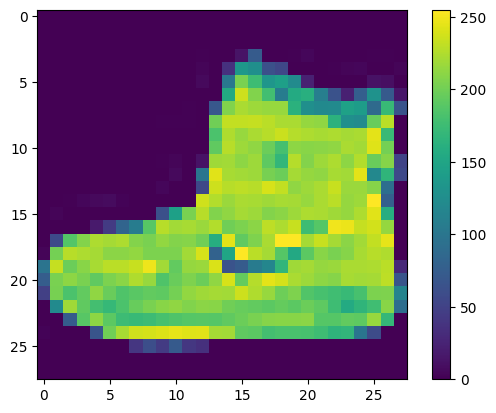

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
n_layers = 5
for i in range(n_layers):
    model.add(tf.keras.layers.Dense(units=64*(n_layers-i),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
hp_learning_rate = 2e-4
model.compile(optimizer=SGD(learning_rate=hp_learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [3]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [4]:
%%time
model.fit(train_images, train_labels, epochs=600, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/600
375/375 [==============================] - 5s 11ms/step - loss: 2.2854 - accuracy: 0.1190 - val_loss: 2.2641 - val_accuracy: 0.1499
Epoch 2/600
375/375 [==============================] - 4s 10ms/step - loss: 2.2475 - accuracy: 0.1701 - val_loss: 2.2252 - val_accuracy: 0.2127
Epoch 3/600
375/375 [==============================] - 4s 9ms/step - loss: 2.2090 - accuracy: 0.2277 - val_loss: 2.1850 - val_accuracy: 0.2896
Epoch 4/600
375/375 [==============================] - 3s 9ms/step - loss: 2.1704 - accuracy: 0.2732 - val_loss: 2.1455 - val_accuracy: 0.3229
Epoch 5/600
375/375 [==============================] - 3s 9ms/step - loss: 2.1322 - accuracy: 0.3021 - val_loss: 2.1045 - val_accuracy: 0.3429
Epoch 6/600
375/375 [==============================] - 3s 9ms/step - loss: 2.0906 - accuracy: 0.3195 - val_loss: 2.0604 - val_accuracy: 0.3627
Epoch 7/600
375/375 [==============================] - 3s 8ms/step - loss: 2.0466 - accuracy: 0.3389 - val_loss: 2.0124 - val_accuracy: 0.38

313/313 - 1s - loss: 0.4983 - accuracy: 0.8256 - 1s/epoch - 4ms/step

Test accuracy: 0.8256000280380249
313/313 [==============================] - 1s 2ms/step


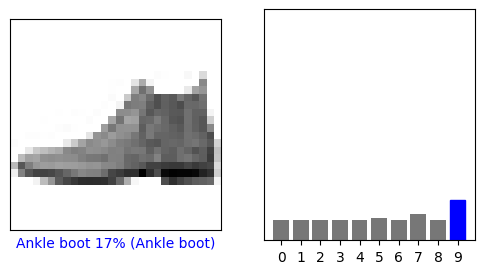

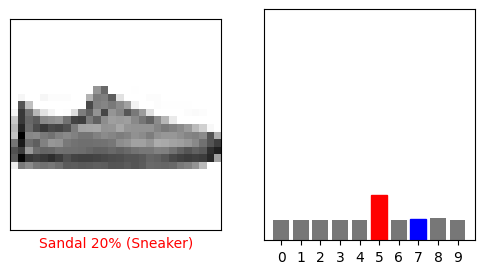

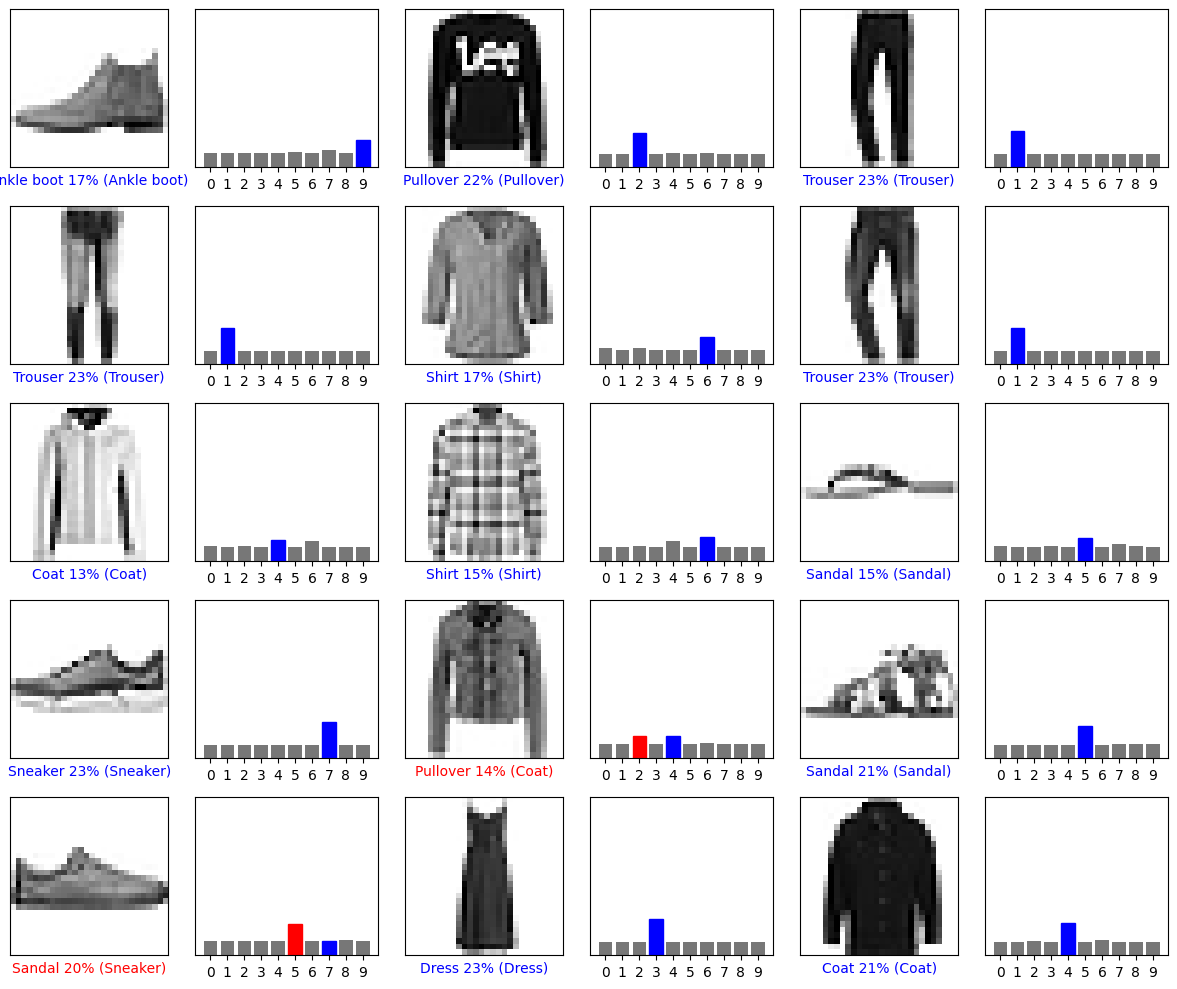

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()